# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Loading data set

In [2]:
df_fi = pd.read_csv(r"C:\Users\User\BankCurupt\Bank_dcf.csv",sep = ',')

In [3]:
df_fi.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr8', 'Attr9',
       'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr30',
       'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38',
       'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45',
       'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr53',
       'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61',
       'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')

In [4]:
df_fi.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr12,Attr13,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.834118,0.031094,0.978440,0.017617,0.741344,0.875099,0.011637,0.013458,0.455331,0.353164,...,0.995314,0.756469,0.009528,0.088799,0.003655,0.013877,0.016297,0.012654,0.277543,0
1,0.830318,0.035191,0.978221,0.016544,0.741265,0.873559,0.011069,0.011092,0.455096,0.353159,...,0.995311,0.755852,0.009532,0.088799,0.002015,0.009195,0.017675,0.008230,0.277490,0
2,0.835345,0.024954,0.980172,0.025679,0.741636,0.873560,0.014547,0.015327,0.455589,0.353166,...,0.995322,0.756308,0.009482,0.088799,0.002602,0.010925,0.015979,0.015947,0.278090,0
3,0.834666,0.037560,0.977635,0.014879,0.741095,0.873560,0.010558,0.014099,0.455333,0.353170,...,0.995352,0.756829,0.009456,0.088912,0.002859,0.013745,0.016553,0.011177,0.277513,0
4,0.831538,0.028123,0.978924,0.019947,0.741467,0.874206,0.012643,0.013307,0.455200,0.353152,...,0.995307,0.755990,0.009555,0.088799,0.002985,0.012217,0.016158,0.013799,0.277552,0


In [5]:
df_fi.shape

(10083, 54)

# Assigning data features to X ,and Target class to y

In [6]:

x = df_fi.iloc[:,0:53]

x.shape

y = df_fi.iloc[:,53]

y.value_counts()


0    9685
1     398
Name: class, dtype: int64

# Performing smote process

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
sm = SMOTE(random_state=2,sampling_strategy=.5)
x_smt, y_smt = sm.fit_sample(x,y.ravel())

In [9]:
print("After OverSampling, counts of label '1': {} ".format(y_smt[y_smt==1].shape[0]))
print("After OverSampling, counts of label '0': {}".format(y_smt[y_smt==0].shape[0]))

After OverSampling, counts of label '1': 4842 
After OverSampling, counts of label '0': 9685


In [10]:
y_smt.shape

(14527,)

# Train Test split

In [11]:

x_train,x_test,y_train,y_test=train_test_split(x_smt,y_smt,test_size=0.40, random_state=42)


In [12]:
print("After spliting, counts of label '1' in TRAIN data: {} ".format(y_train[y_train==1].shape[0]))
print("After spliting, counts of label '0' in TRAIN data: {}".format(y_train[y_train==0].shape[0]))

After spliting, counts of label '1' in TRAIN data: 2924 
After spliting, counts of label '0' in TRAIN data: 5792


In [13]:
print("After spliting, counts of label '1' in TEST data: {} ".format(y_test[y_test==1].shape[0]))
print("After spliting, counts of label '0' in TEST data: {}".format(y_test[y_test==0].shape[0]))

After spliting, counts of label '1' in TEST data: 1918 
After spliting, counts of label '0' in TEST data: 3893


In [14]:
x_train.shape

(8716, 53)

# logistic model classifying with hyper parameter tuning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train,y_train)



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", C

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1'}
accuracy : 0.7558513079394218


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1'}
accuracy : 0.7558513079394218


In [38]:
logreg=LogisticRegression(penalty='l1',C=100.0)

In [39]:
logreg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [42]:
#testing with best parameter logistic regression
logreg.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
y_predicted = logreg.predict(x_test)

# Confusion matrix and classification report

In [44]:

#y_predicted=model_lr.predict(x_test)

print(classification_report(y_test, y_predicted))

cm=confusion_matrix(y_test, y_predicted)
print(cm)
print(accuracy_score(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3893
           1       0.72      0.44      0.55      1918

   micro avg       0.76      0.76      0.76      5811
   macro avg       0.74      0.68      0.69      5811
weighted avg       0.75      0.76      0.74      5811

[[3555  338]
 [1069  849]]
0.7578729994837378


# AUC ROC curve

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg_cv.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

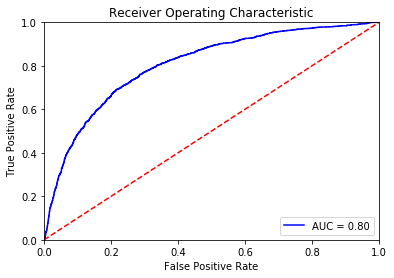

In [22]:

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# auc value

In [23]:
print("AUC value",roc_auc)

AUC value 0.8049174918110553


In [26]:
gini = (2*roc_auc)-1

In [28]:
print("gini score = ",gini)

gini score =  -0.6098349836221106


In [31]:
confi_lvl = logreg_cv.predict_proba(x)

In [32]:
confi_lvl = pd.DataFrame(confi_lvl)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FB48642E8>,
      dtype=object)

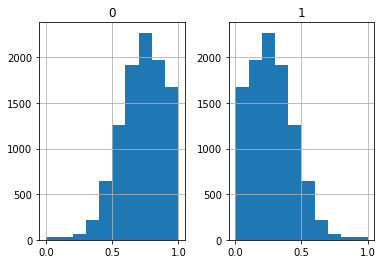

In [33]:
confi_lvl.hist()

In [35]:
feature_importance = abs(logreg_cv.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [ ]:
featfig = plt.figure(figsize=(10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [ ]:
feature_importance.shape[0]

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_predicted)